In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 32})
import seaborn as sns
sns.set(context="talk")
import datetime as dt

from warnings import filterwarnings
filterwarnings("ignore")

import scipy.stats as stat

## Import Data

In [2]:
df = pd.read_excel("dataset/Daily Update Data Agregat Covid-19 Jakarta.xlsx", date_parser="Tanggal")
df.columns = df.columns.str.replace(" ", "_").str.lower()
df.drop(columns=["belum_diketahui_(masih_verifikasi)", "menunggu_hasil", "tenaga_kesehatan_terinfeksi"], 
        axis="columns", inplace=True)
df["jam"] = df["jam"].fillna(df["jam"].mode()[0])
df["month"] = pd.DatetimeIndex(df['tanggal']).month
df["year"] = pd.DatetimeIndex(df['tanggal']).year
df["hari"] = pd.DatetimeIndex(df["tanggal"]).day

In [55]:
df

,tanggal,jam,tanggal_jam,total_pasien,sembuh,meninggal,self_isolation,masih_perawatan,positif_harian,positif_aktif,sembuh_harian,tanpa_gejala,bergejala,belum_ada_data,month,year,hari
0,2020-03-01,8.0,2020-03-01 18:00:00,0,0,0,0,0,0,0,0,NaN,NaN,NaN,3,2020,1
1,2020-03-02,8.0,2020-03-02 18:00:00,0,0,0,0,0,0,0,0,NaN,NaN,NaN,3,2020,2
2,2020-03-03,8.0,2020-03-03 18:00:00,3,0,1,0,2,3,2,0,NaN,NaN,NaN,3,2020,3
3,2020-03-04,8.0,2020-03-04 18:00:00,3,0,1,0,2,0,2,0,NaN,NaN,NaN,3,2020,4
4,2020-03-05,8.0,2020-03-05 18:00:00,7,0,3,0,4,4,4,0,NaN,NaN,NaN,3,2020,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,2021-07-08,8.0,2021-07-08 08:00:00,623277,512085,9110,72361,29721,12974,102082,10886,14748.0,50824.0,36510.0,7,2021,8
495,2021-07-09,8.0,2021-07-09 08:00:00,636389,526941,9306,73239,26903,13112,100142,14856,10095.0,40727.0,49320.0,7,2021,9
496,2021-07-10,8.0,2021-07-10 08:00:00,649309,543867,9357,71812,24273,12920,96085,16926,7999.0,26379.0,61707.0,7,2021,10
497,2021-07-11,8.0,2021-07-11 08:00:00,662442,564437,9395,68251,20359,13133,88610,20570,4769.0,12893.0,70948.0,7,2021,11


# Plotting Perkembangan Covid Tahun 2021 

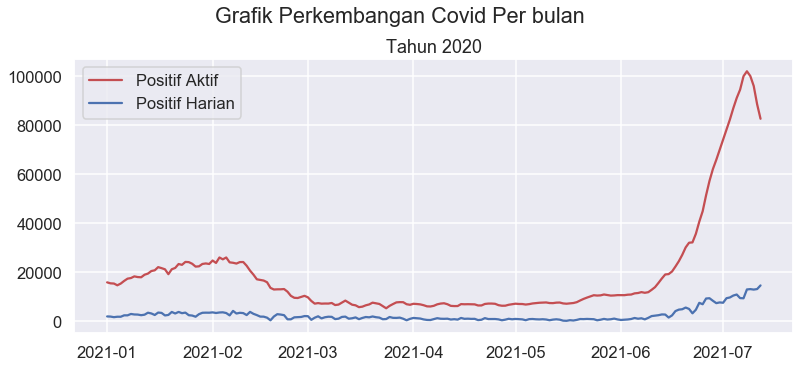

In [4]:
fig, ax = plt.subplots(figsize=(11, 5), constrained_layout=True)
fig.suptitle("Grafik Perkembangan Covid Per bulan")

ax.set_title("Tahun 2020")
ax.plot(df[df["year"]==2021].groupby(["tanggal"])[["positif_aktif"]].mean(),
               color="r",
               label="Positif Aktif")
ax.plot(df[df["year"]==2021].groupby(["tanggal"])[["positif_harian"]].mean(),
               color="b",
               label="Positif Harian")
ax.legend()

## Grafik Perkembangan Tahun 2020 sampai 2021

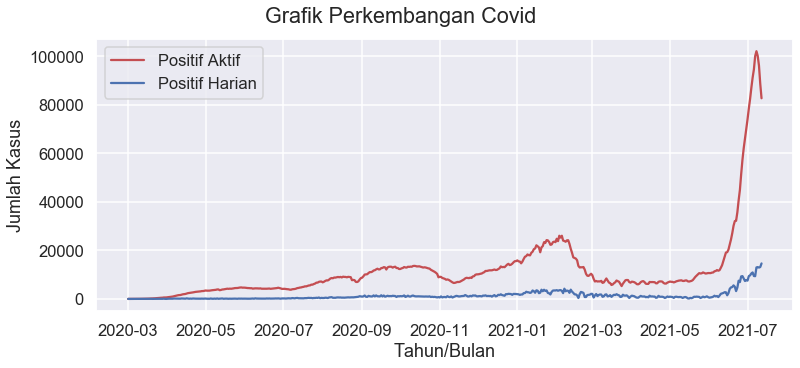

In [81]:
fig, ax = plt.subplots(figsize=(11, 5), constrained_layout=True)
fig.suptitle("Grafik Perkembangan Covid")
ax.plot(df.groupby(["tanggal"])[["positif_aktif"]].mean(),
               color="r",
               label="Positif Aktif")
ax.plot(df.groupby(["tanggal"])[["positif_harian"]].mean(),
               color="b",
               label="Positif Harian")
ax.legend()
ax.set_xlabel("Tahun/Bulan")
ax.set_ylabel("Jumlah Kasus")

plt.show()

## Plot Perkembangan Pasien Sembuh harian dan positif harian

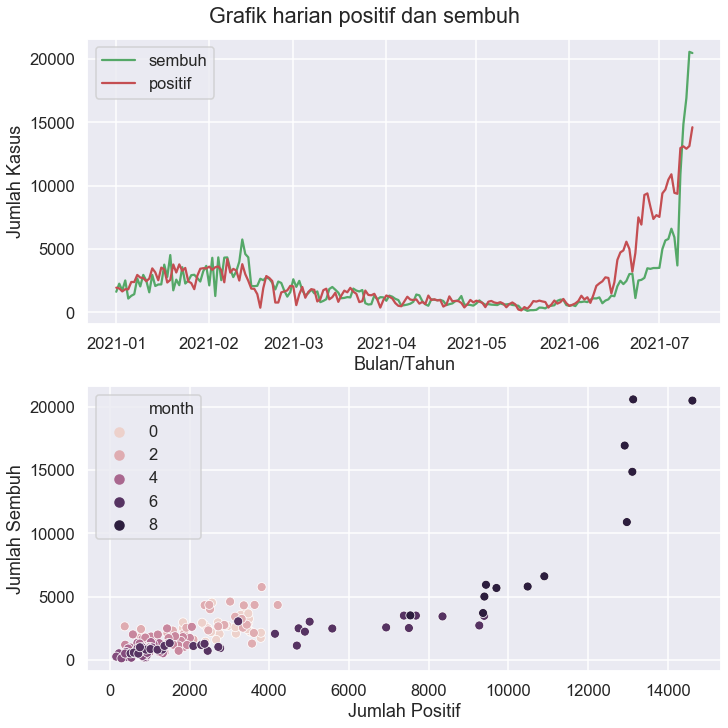

In [54]:
fig, ax = plt.subplots(nrows=2, figsize=(10, 10), constrained_layout=True)
fig.suptitle("Grafik harian positif dan sembuh")
_ = ax[0].plot(df[df["year"] == 2021].groupby("tanggal")["sembuh_harian"].mean(), color="g", label="sembuh")
_ = ax[0].plot(df[df["year"] == 2021].groupby("tanggal")["positif_harian"].mean(), color="r", label="positif")
_ = ax[0].legend()
_ = ax[0].set_xlabel("Bulan/Tahun")
_ = ax[0].set_ylabel("Jumlah Kasus")

_ = sns.scatterplot(data=df[df["year"] == 2021], x="positif_harian", y="sembuh_harian", hue="month", ax=ax[1], cmap="blue")
_ = ax[1].set_xlabel("Jumlah Positif")
_ = ax[1].set_ylabel("Jumlah Sembuh")

plt.show()

## Plot parameter bergejala, masih perawatan, dan self isolation

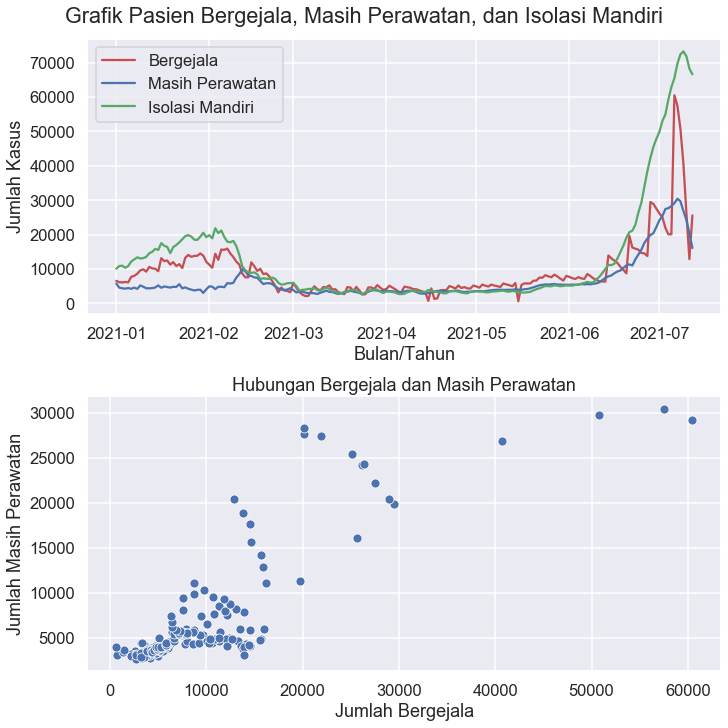

In [53]:
fig, ax = plt.subplots(figsize=(10, 10), nrows=2, constrained_layout=True)
fig.suptitle("Grafik Pasien Bergejala, Masih Perawatan, dan Isolasi Mandiri")
_ = ax[0].plot(df[df["year"] == 2021].groupby("tanggal")["bergejala"].mean(), color="r", label="Bergejala")
_ = ax[0].plot(df[df["year"] == 2021].groupby("tanggal")["masih_perawatan"].mean(), color="b", label="Masih Perawatan")
_ = ax[0].plot(df[df["year"] == 2021].groupby("tanggal")["self_isolation"].mean(), color="g", label="Isolasi Mandiri")
_ = ax[0].set_xlabel("Bulan/Tahun")
_ = ax[0].set_ylabel("Jumlah Kasus")
ax[0].legend()

_ = ax[1].set_title("Hubungan Bergejala dan Masih Perawatan")
_ = sns.scatterplot(data=df[df["year"] == 2021], x="bergejala", y="masih_perawatan", ax=ax[1])
_ = ax[1].set_xlabel("Jumlah Bergejala")
_ = ax[1].set_ylabel("Jumlah Masih Perawatan")
plt.show()

## Plot Jumlah Sembuh dan Jumlah Meninggal

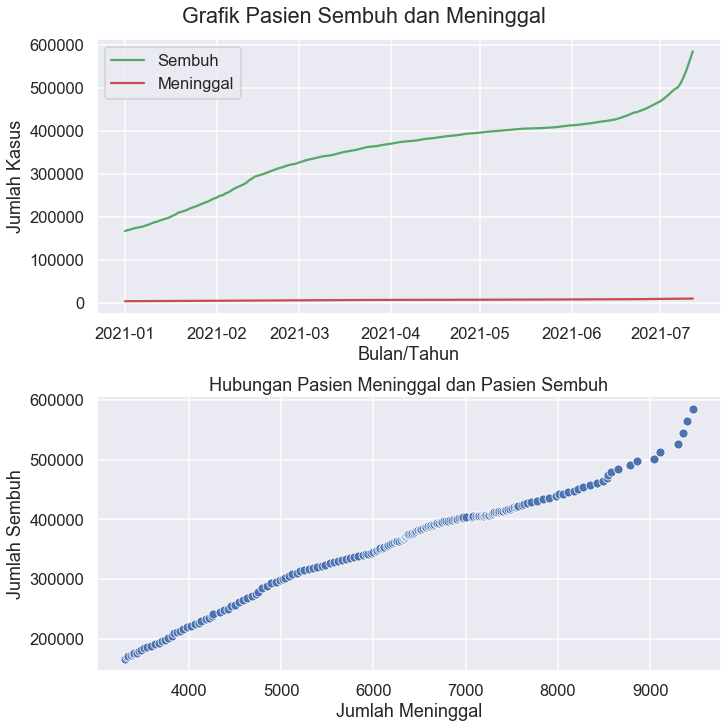

In [59]:
fig, ax = plt.subplots(figsize=(10, 10), nrows=2, constrained_layout=True)
fig.suptitle("Grafik Pasien Sembuh dan Meninggal")
_ = ax[0].plot(df[df["year"] == 2021].groupby("tanggal")["sembuh"].mean(), color="g", label="Sembuh")
_ = ax[0].plot(df[df["year"] == 2021].groupby("tanggal")["meninggal"].mean(), color="r", label="Meninggal")
_ = ax[0].set_xlabel("Bulan/Tahun")
_ = ax[0].set_ylabel("Jumlah Kasus")
ax[0].legend()

_ = ax[1].set_title("Hubungan Pasien Meninggal dan Pasien Sembuh")
_ = sns.scatterplot(data=df[df["year"] == 2021], x="meninggal", y="sembuh", ax=ax[1])
_ = ax[1].set_xlabel("Jumlah Meninggal")
_ = ax[1].set_ylabel("Jumlah Sembuh")
plt.show()

## Plot Positif Aktif dan Sembuh Harian

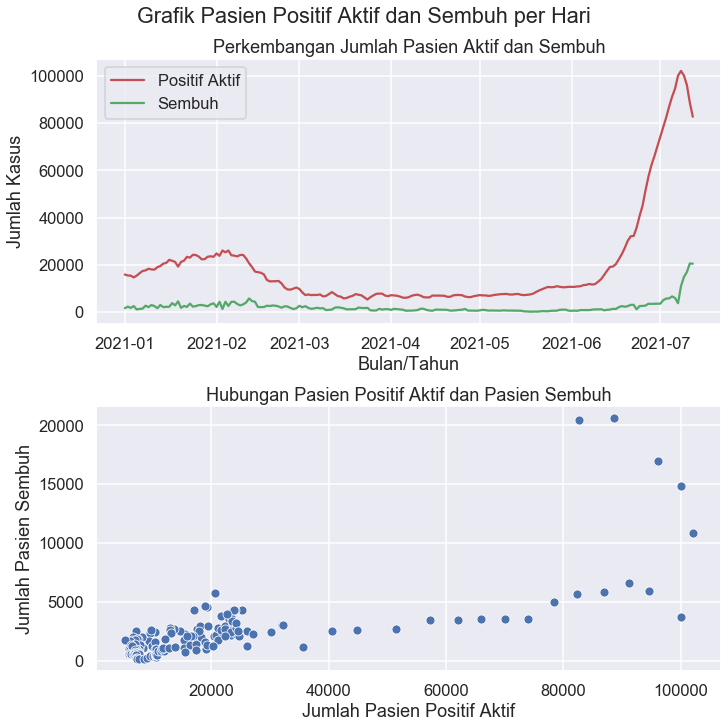

In [82]:
fig, ax = plt.subplots(figsize=(10, 10), nrows=2, constrained_layout=True)
fig.suptitle("Grafik Pasien Positif Aktif dan Sembuh per Hari")
_ = ax[0].set_title("Perkembangan Jumlah Pasien Aktif dan Sembuh")
_ = ax[0].plot(df[df["year"] == 2021].groupby("tanggal")["positif_aktif"].mean(), color="r", label="Positif Aktif")
_ = ax[0].plot(df[df["year"] == 2021].groupby("tanggal")["sembuh_harian"].mean(), color="g", label="Sembuh")
_ = ax[0].set_xlabel("Bulan/Tahun")
_ = ax[0].set_ylabel("Jumlah Kasus")
ax[0].legend()

_ = ax[1].set_title("Hubungan Pasien Positif Aktif dan Pasien Sembuh")
_ = sns.scatterplot(data=df[df["year"] == 2021], x="positif_aktif", y="sembuh_harian", ax=ax[1])
_ = ax[1].set_xlabel("Jumlah Pasien Positif Aktif")
_ = ax[1].set_ylabel("Jumlah Pasien Sembuh")
plt.show()

## Plot Pasien Bergejala dan tanpa gejala

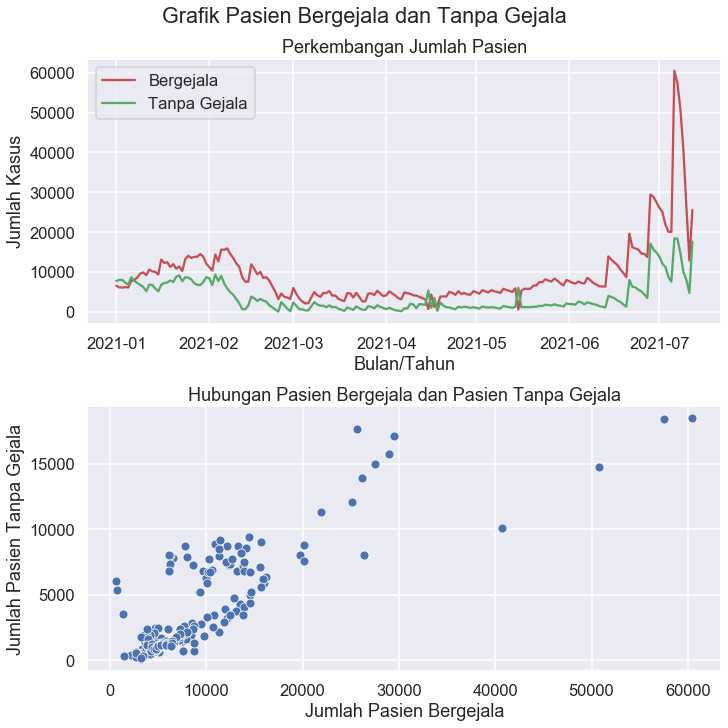

In [65]:
fig, ax = plt.subplots(figsize=(10, 10), nrows=2, constrained_layout=True)
fig.suptitle("Grafik Pasien Bergejala dan Tanpa Gejala")
_ = ax[0].set_title("Perkembangan Jumlah Pasien")
_ = ax[0].plot(df[df["year"] == 2021].groupby("tanggal")["bergejala"].mean(), color="r", label="Bergejala")
_ = ax[0].plot(df[df["year"] == 2021].groupby("tanggal")["tanpa_gejala"].mean(), color="g", label="Tanpa Gejala")
_ = ax[0].set_xlabel("Bulan/Tahun")
_ = ax[0].set_ylabel("Jumlah Kasus")
ax[0].legend()

_ = ax[1].set_title("Hubungan Pasien Bergejala dan Pasien Tanpa Gejala")
_ = sns.scatterplot(data=df[df["year"] == 2021], x="bergejala", y="tanpa_gejala", ax=ax[1])
_ = ax[1].set_xlabel("Jumlah Pasien Bergejala")
_ = ax[1].set_ylabel("Jumlah Pasien Tanpa Gejala")
plt.show()

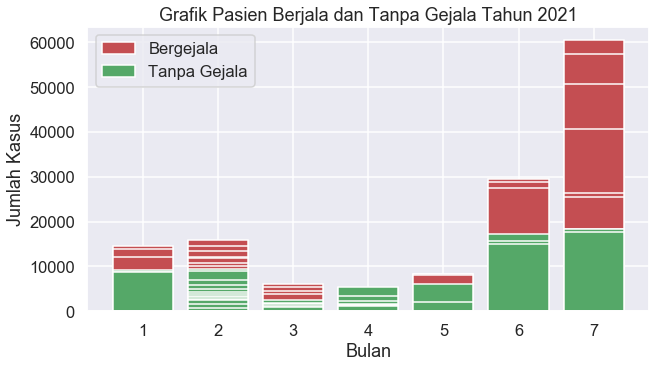

In [80]:
plt.figure(constrained_layout=True, figsize=(9, 5))

plt.title("Grafik Pasien Berjala dan Tanpa Gejala Tahun 2021")
plt.bar(height=df[df["year"] == 2021]["bergejala"], x=df[df['year'] == 2021]["month"], color="r", label="Bergejala")
plt.bar(height=df[df["year"] == 2021]["tanpa_gejala"], x=df[df['year'] == 2021]["month"], color="g", label="Tanpa Gejala")
plt.legend()

plt.xlabel("Bulan")
plt.ylabel("Jumlah Kasus")
plt.show()